In [1]:
import numpy as np
import scipy.signal
from matplotlib.pyplot import *
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
from passe_bas_fonction import *
from spectrogram import *

import matplotlib.image as mpimg
import glob
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, UpSampling2D, Input,Dropout,Conv2DTranspose,Concatenate
from keras.layers import  Conv1D, MaxPooling1D, UpSampling1D,Concatenate, PReLU
from keras import optimizers

Using TensorFlow backend.


In [2]:
original_dataset_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\recordings\\"

base_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\super_resolution_re_im"
train_dir = os.path.join(base_dir, 'train\\')

test_dir = os.path.join(base_dir, 'test\\')
train_dir_filtré=os.path.join(base_dir, 'train_dir_filtré\\')
test_dir_filtré=os.path.join(base_dir, 'test_dir_filtré\\')

In [3]:
Xtest,Phase_test=dir_to_log_mel(test_dir)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\


In [4]:
print(Xtest.shape)

(200, 1024, 16, 1)


In [5]:
Xtrain,Phase_train=dir_to_log_mel(train_dir)
Xtrain_fil,Phase_train_fil=dir_to_log_mel(train_dir_filtré)
Xtest_fil,Phase_test_fil=dir_to_log_mel(test_dir_filtré)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\7_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_16.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_28.wav
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\tr

In [6]:
input_img = Input(shape=(1024, 16,1))

conv1= Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
max1= MaxPooling2D((2, 1), padding='same')(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(max1)
encoded = MaxPooling2D((2, 1), padding='same')(conv2)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 1))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 1))(x)



decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizers.Adam(lr=0.001), loss='mse')
#optimizer=optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
autoencoder.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024, 16, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1024, 16, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 512, 16, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 16, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 16, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 16, 32)       9248      
_________________________________________________________________
conv

In [7]:

autoencoder.fit(Xtrain_fil,Xtrain,epochs=10,
                batch_size=20,
                shuffle=True,
                validation_data=(Xtest_fil, Xtest))

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 15s 9ms/step - loss: 0.0167 - val_loss: 0.0106
Epoch 2/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0104 - val_loss: 0.0089
Epoch 3/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0092 - val_loss: 0.0063
Epoch 4/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 5/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 6/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 7/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 8/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 9/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.00

In [8]:
decoded = autoencoder.predict(Xtest_fil)

In [9]:
p=16
#indice to display
Spec=np.reshape(Xtest[p],(Xtest.shape[1],Xtest.shape[2]))
Spec_fil=np.reshape(Xtest_fil[p],(Xtest_fil.shape[1],Xtest_fil.shape[2]))
Spec_dec=np.reshape(decoded[p],(decoded.shape[1],decoded.shape[2]))
print(Spec.shape)

(1024, 16)


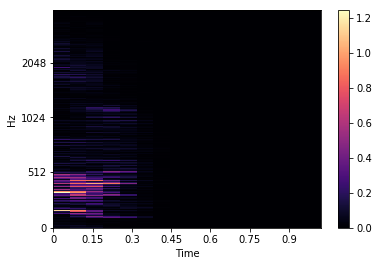

In [10]:

librosa.display.specshow(Spec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

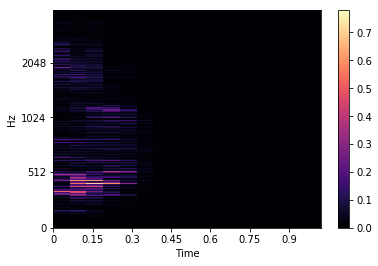

In [11]:
librosa.display.specshow(Spec_fil, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

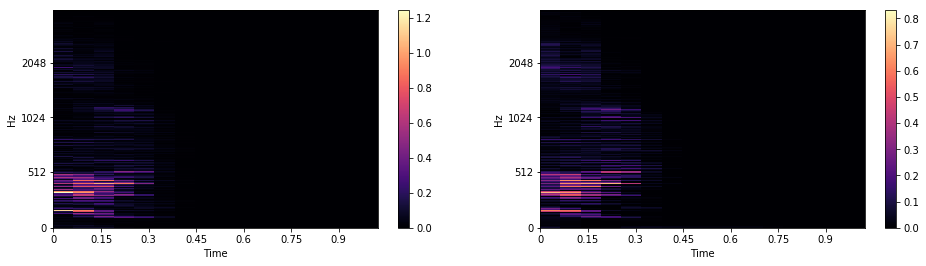

In [12]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
librosa.display.specshow(Spec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()
plt.subplot(1,2,2)
librosa.display.specshow(Spec_dec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

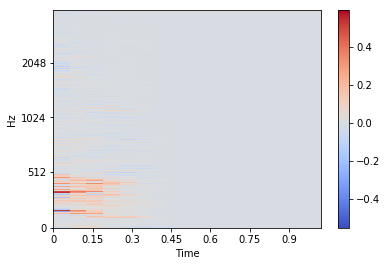

In [13]:
Delta=Spec-Spec_dec
librosa.display.specshow(Delta, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

In [14]:
print(Phase_test.shape)

(200, 1024, 16)


In [22]:
Lin_test=mel_to_linspec(Xtest,sr=8000,n_mels=1024,n_fft=2048)
Lin_dec=mel_to_linspec(decoded,sr=8000,n_mels=1024,n_fft=2048)
Lin_test_fil=mel_to_linspec(Xtest_fil,sr=8000,n_mels=1024,n_fft=2048)

In [20]:
sr=8000
xtest=librosa.istft(Lin_test[p] * Phase_test[p]*100)
audio_path_record="C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\"
audio_path_record_in=os.path.join(audio_path_record,"0_jackson_0_normal.wav")
soundfile.write(audio_path_record_in,xtest,sr)
ipd.Audio(audio_path_record_in)

In [21]:
y=librosa.istft(Lin_dec[p] * Phase_test[p]*100)
audio_path_record_out=os.path.join(audio_path_record,"0_jackson_0_reconstructed.wav")
soundfile.write(audio_path_record_out,y,sr)
ipd.Audio(audio_path_record_out)


In [23]:
xtest_fil=librosa.istft(Lin_test_fil[p] * Phase_test[p]*100)
audio_path_record_in_fil=os.path.join(audio_path_record,"0_jackson_0_filtered.wav")
soundfile.write(audio_path_record_in_fil,xtest_fil,sr)
ipd.Audio(audio_path_record_in_fil)